# Importing Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from operator import itemgetter
%matplotlib inline

#Reading Data

In [2]:
from google.colab import files
files.upload()

Saving column_2C.dat to column_2C.dat


{'column_2C.dat': b'63.03 22.55 39.61 40.48 98.67 -0.25 AB\n39.06 10.06 25.02 29 114.41 4.56 AB\n68.83 22.22 50.09 46.61 105.99 -3.53 AB\n69.3 24.65 44.31 44.64 101.87 11.21 AB\n49.71 9.65 28.32 40.06 108.17 7.92 AB\n40.25 13.92 25.12 26.33 130.33 2.23 AB\n53.43 15.86 37.17 37.57 120.57 5.99 AB\n45.37 10.76 29.04 34.61 117.27 -10.68 AB\n43.79 13.53 42.69 30.26 125 13.29 AB\n36.69 5.01 41.95 31.68 84.24 0.66 AB\n49.71 13.04 31.33 36.67 108.65 -7.83 AB\n31.23 17.72 15.5 13.52 120.06 0.5 AB\n48.92 19.96 40.26 28.95 119.32 8.03 AB\n53.57 20.46 33.1 33.11 110.97 7.04 AB\n57.3 24.19 47 33.11 116.81 5.77 AB\n44.32 12.54 36.1 31.78 124.12 5.42 AB\n63.83 20.36 54.55 43.47 112.31 -0.62 AB\n31.28 3.14 32.56 28.13 129.01 3.62 AB\n38.7 13.44 31 25.25 123.16 1.43 AB\n41.73 12.25 30.12 29.48 116.59 -1.24 AB\n43.92 14.18 37.83 29.74 134.46 6.45 AB\n54.92 21.06 42.2 33.86 125.21 2.43 AB\n63.07 24.41 54 38.66 106.42 15.78 AB\n45.54 13.07 30.3 32.47 117.98 -4.99 AB\n36.13 22.76 29 13.37 115.58 -3.24 AB\n

In [3]:
import os
os.listdir('../content')

['.config', 'column_2C.dat', 'sample_data']

In [4]:
df = pd.read_table('column_2C.dat',sep = '\s+', names = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle','sacral slope', 'pelvic radius','grade of spondylolisthesis','label'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [5]:
df.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [0]:
df['label'] = df['label'].map({'AB':1,'NO':0})

In [7]:
df.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


In [8]:
df['label'].value_counts(normalize=True)

1    0.677419
0    0.322581
Name: label, dtype: float64

# Preprocessing and EDA

### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


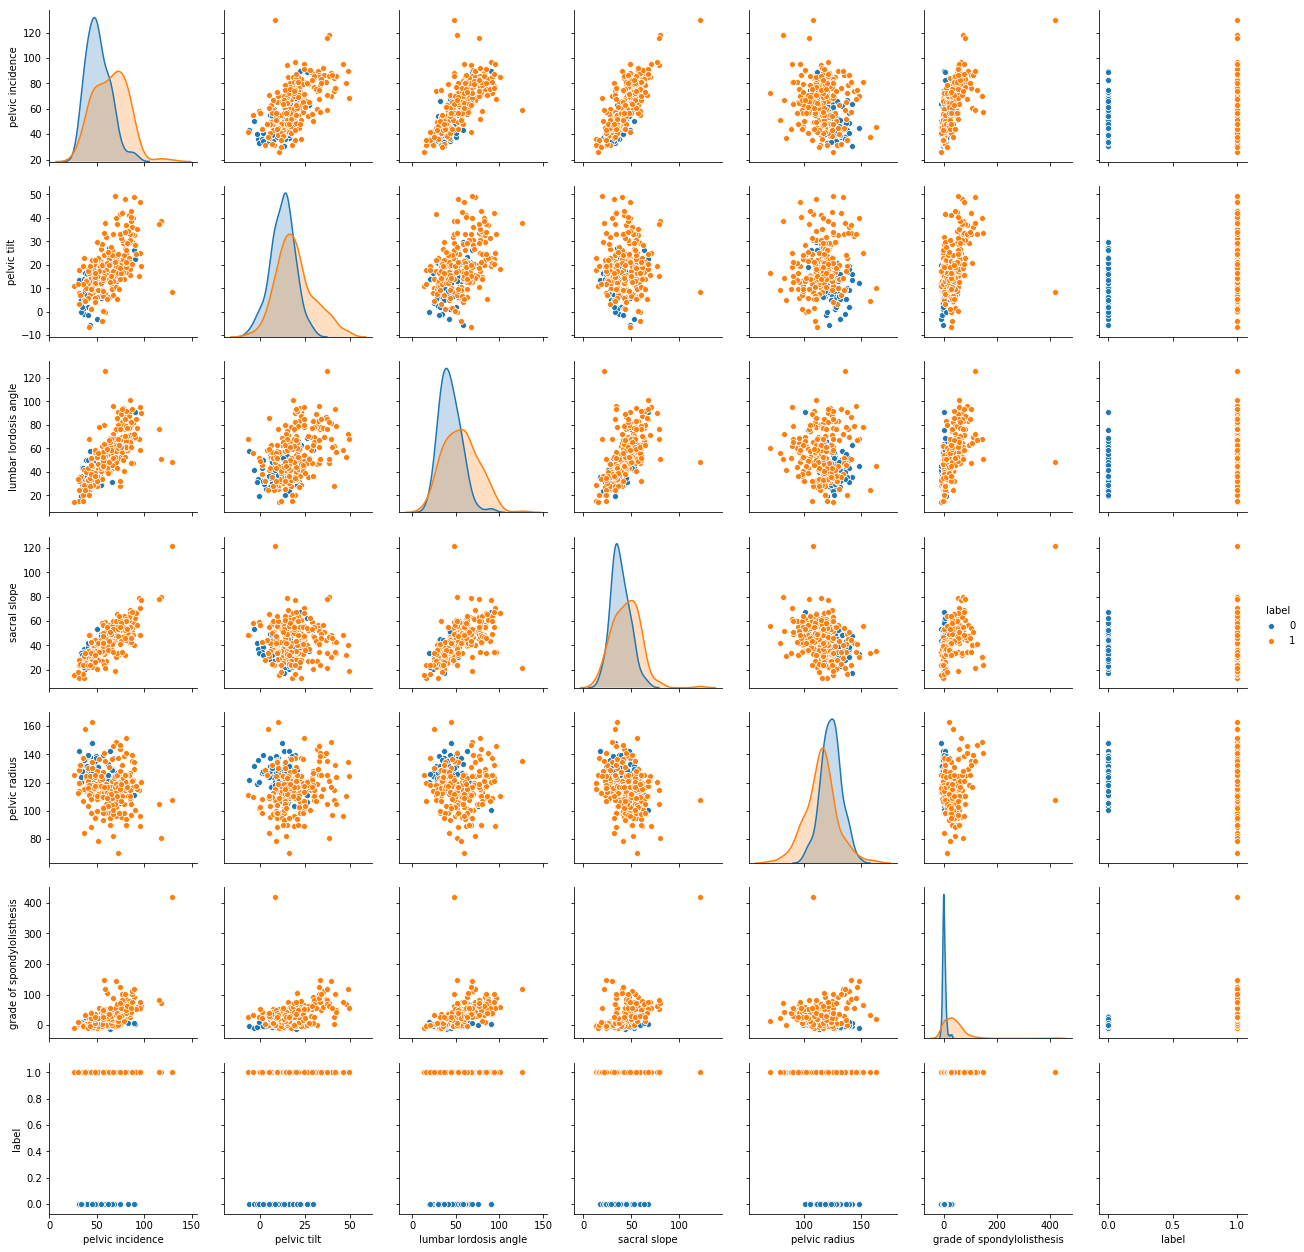

In [9]:
plt.rcParams['figure.figsize'] = (10,8)
#df_n = df.drop('label',axis = 1)
sns.pairplot(df,hue = 'label');

### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

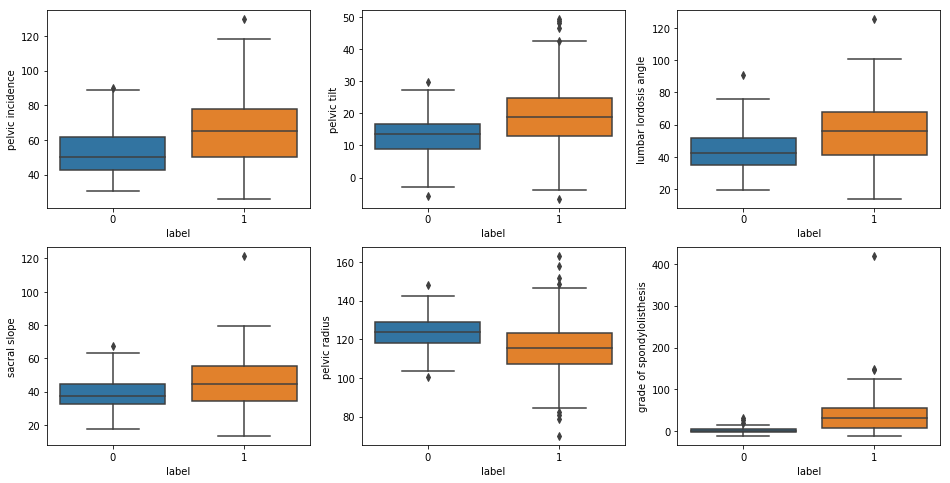

In [10]:
_,axes = plt.subplots(2,3,figsize = (16,8))
for i,name in enumerate(df.columns[:-1]):
  ax = axes[int(i/3),i%3]
  sns.boxplot(x = 'label', y = name, data = df, ax=ax)

### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [11]:
df.shape

(310, 7)

In [12]:
df_class0 = df[df['label'] == 0]
df_class0.shape

(100, 7)

In [0]:
x_train = df_class0[:70] # Keeping the first 70 rows of class 0 in train data
x_test = df_class0[70:]  # Keeping the left over rows of class 0 in test data

In [14]:
df_class1 = df[df['label'] == 1] # Selecting all the Class 1 rows
df_class1.shape

(210, 7)

In [0]:
x_train_1 = df_class1[:140] # Keeping the first 140 rows in train data
x_test_1 = df_class1[140:]  # Keeping the rest of the rows in test data

In [0]:
final_train = pd.concat([x_train,x_train_1]) # Concatinating the rows of class 0 and class 1 and forming the final train data
final_test = pd.concat([x_test,x_test_1]) #Concatinating the rows of class 0 and class 1 and forming the final test data

In [17]:
final_train.shape,final_test.shape

((210, 7), (100, 7))

In [0]:
f_train = final_train.sort_index() # sorting the rows in the newly generated train dataset according to the original index 

In [0]:
f_train.reset_index();

In [0]:
f_test = final_test.sort_index()# sorting the rows in the newly generated test dataset according to the original index
f_test.reset_index();

In [0]:
df['index'] = df.index

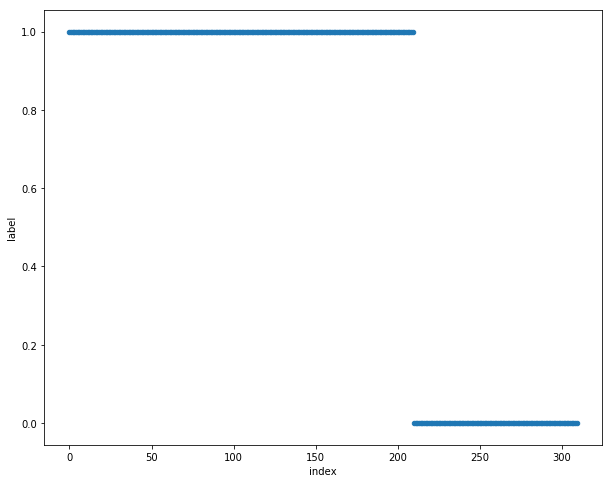

In [22]:
df.plot(x = 'index',y='label',kind = 'scatter')

Through this plot, I infer that the first 210 rows all have label 1 and following 100 rows have label 0

In [23]:
df.iloc[205:215,-2]

205    1
206    1
207    1
208    1
209    1
210    0
211    0
212    0
213    0
214    0
Name: label, dtype: int64

1. The data in the dataframe has label '1' from index 0 to 209.
2. The data in the dataframe has label '0' from index 210 to 309.

In [0]:
df.drop('index',axis = 1,inplace=True)

In [0]:
x_train, y_train = f_train.iloc[:,:-1],f_train.iloc[:,-1] # Removing the label column from the dataset and storing it in y_train

In [26]:
x_train.shape,y_train.shape

((210, 6), (210,))

In [0]:
x_test, y_test = f_test.iloc[:,:-1],f_test.iloc[:,-1] # Reomoving the label column from the dataset and storing it in y_test

In [28]:
x_test.shape,y_test.shape

((100, 6), (100,))

###i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [29]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5) # KNN with Distance metric set as Euclidean
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = clf.predict(x_test) # KNN predicting the labels for the test set

In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[20 10]
 [ 0 70]]


###ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4,1, } (in reverse order). You are welcome to use smaller increments of k. Which k ∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision,and F-score when k = k ∗. 1

In [0]:
train_error = []
train_accuracy = []
test_error = []
test_accuracy = []


In [0]:
# Traing KNN for different values of k and calculating and storing the error rate for each value of k
for k in range(208,0,-3):
  clf = KNeighborsClassifier(n_neighbors = k)
  clf.fit(x_train,y_train)
  y_pred_train = clf.predict(x_train)
  train_error.append(np.mean(y_pred_train != y_train))
  train_accuracy.append(accuracy_score(y_train,y_pred_train))
  y_pred_test = clf.predict(x_test)
  test_error.append(np.mean(y_pred_test != y_test))
  test_accuracy.append(accuracy_score(y_test,y_pred_test))

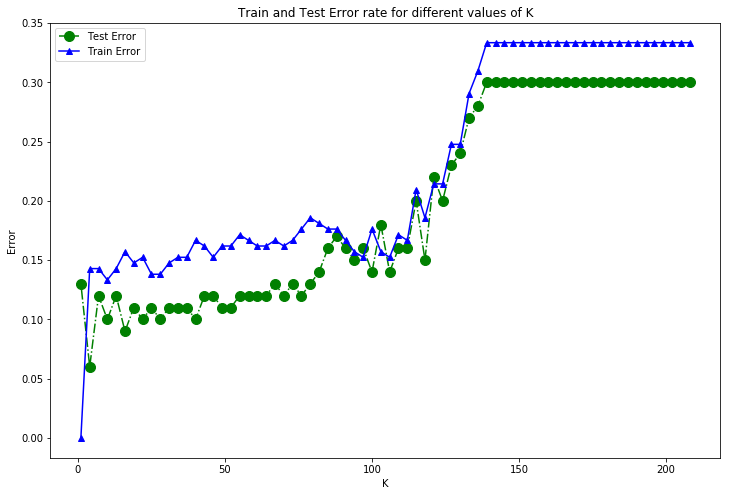

In [46]:
# Plotting the test error and the train error versus k
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(range(208,0,-3),test_error,color = 'green', marker = 'o', linestyle = '-.',markersize = 10,label = 'Test Error')
plt.plot(range(208,0,-3),train_error,color = 'blue', marker = '^', linestyle = '-',label = 'Train Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.title('Train and Test Error rate for different values of K');

In [0]:
k = [k for k in range(208,0,-3)]
test_error_k = list(zip(test_error,k))

In [48]:
test_error_k.sort(key=itemgetter(0)) # Finding the optimum value of k
test_error_k[:5]

[(0.06, 4), (0.09, 16), (0.1, 40), (0.1, 28), (0.1, 22)]

In [49]:
print("The optimum k is {} and the test error at k = {} is {} ".format(test_error_k[0][1],test_error_k[0][1],test_error_k[0][0]))

The optimum k is 4 and the test error at k = 4 is 0.06 


####Training for optimum value of k = 4

In [0]:
clf = KNeighborsClassifier(n_neighbors = 4)
clf.fit(x_train,y_train)
y_pred_test = clf.predict(x_test)

####Confusion Matrix

In [0]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[25  5]
 [ 1 69]]


####Precision and F-Score

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



###iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20,30, . . . , 210}. Note: for each N, select your training set by choosing the first N/3 rows of Class 0 and the first N − N/3 rows of Class 1 in the training set you creatd in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

In [0]:
x_train['label'] = y_train

In [0]:
best_test_error = []
for n in range(10,220,10):
  test_error_3 = []
  x_train_0 = x_train.iloc[140:140+(n//3),:]
  x_train_1 = x_train.iloc[0:n-(n//3),:]
  final_x_train = pd.concat([x_train_1,x_train_0])
  #final_x_train.reset_index()
  #print(final_x_train.head())
  final_y_train = final_x_train['label']
  final_x_train.drop('label',axis = 1,inplace = True)
  
  for k in range(1,n,5):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(final_x_train,final_y_train)
    y_test_pred = clf.predict(x_test)
    test_error_3.append(np.mean(y_test_pred != y_test))
  k = [k for k in range(1,n,5)]
  best_test_error.append((n,min(list(zip(test_error_3,k)))[0],min(list(zip(test_error_3,k)))[1]))

In [53]:
best_test_error_sorted = sorted(best_test_error,key = itemgetter(1))
best_test_error_sorted[:5] # The list of tuples printed contains Number of Samples, Test error rate and k value respectively

[(210, 0.08, 6),
 (190, 0.09, 6),
 (200, 0.09, 6),
 (180, 0.1, 6),
 (150, 0.13, 16)]

In [54]:
print("The best test error obtained is {} when number of training samples is {} and k is {} ".format(best_test_error_sorted[0][1],best_test_error_sorted[0][0],best_test_error_sorted[0][2]))

The best test error obtained is 0.08 when number of training samples is 210 and k is 6 


In [0]:
err = [s[1] for s in best_test_error]
k = [s[2] for s in best_test_error]

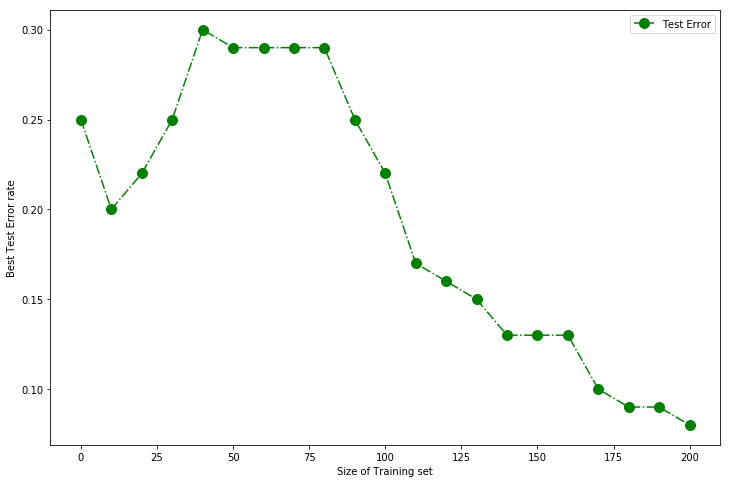

In [0]:
# Plotting the best test error versus the size of the training set
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(range(0,210,10),err,color = 'green', marker = 'o', linestyle = '-.',markersize = 10,label = 'Test Error')
plt.xlabel('Size of Training set')
plt.ylabel('Best Test Error rate')
plt.legend()

###(d) Replace the Euclidean metric with the following metrics 4 and test them. Summarize the test errors (i.e., when k = k ∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196 }. 
###i. Minkowski Distance:
###A. which becomes Manhattan Distance with p = 1.
###B. with log 10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k ∗ you found for the Manhattan distance in 1(d)iA. What is the best log 10(p)?
###C. which becomes Chebyshev Distance with p → ∞
###ii. Mahalanobis Distance. 5

In [0]:
x_train_d = x_train.iloc[:,:-1]

####Manhattan Distance

In [0]:
# Training a KNN for different values of k with distance metric as Manhattan
test_error = []
for k in range(1,200,5):
  clf = KNeighborsClassifier(n_neighbors = k, p = 1)
  clf.fit(x_train_d,y_train)
  y_pred_test = clf.predict(x_test)
  test_error.append((np.mean(y_pred_test != y_test),k))

In [58]:
best_test_error = sorted(test_error,key=itemgetter(0))# Sorting in ascending order on the basis of test error
best_test_error[:5]

[(0.11, 6), (0.11, 11), (0.11, 26), (0.12, 1), (0.12, 16)]

In [59]:
print('The best test error is {} and the optimum k is {}'.format(best_test_error[1][0],best_test_error[1][1]))

The best test error is 0.11 and the optimum k is 11


The optimum k for our data with distance metric being Manhattan is 11.

####B. with log 10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k ∗ you found for the Manhattan distance in 1(d)iA. What is the best log 10(p)?

In [60]:
a = np.arange(0.1,1.1,0.1) # an array consisting values to which log(p) belongs
c = 10**a # c is an array containing the actual values of p
c

array([ 1.25892541,  1.58489319,  1.99526231,  2.51188643,  3.16227766,
        3.98107171,  5.01187234,  6.30957344,  7.94328235, 10.        ])

In [0]:
# Training KNN and calculating the test error for different values of p
test_error = [] 
for p in c:
  clf = KNeighborsClassifier(n_neighbors = 6, p = p)
  clf.fit(x_train_d,y_train)
  y_pred_test = clf.predict(x_test)
  test_error.append((np.mean(y_pred_test != y_test),p))

In [62]:
best_test_error = sorted(test_error,key=itemgetter(0))
best_test_error

[(0.06, 3.9810717055349722),
 (0.07, 5.011872336272724),
 (0.08, 1.9952623149688797),
 (0.08, 2.51188643150958),
 (0.08, 3.1622776601683795),
 (0.08, 6.309573444801933),
 (0.09, 1.2589254117941673),
 (0.09, 1.5848931924611136),
 (0.09, 7.943282347242816),
 (0.09, 10.0)]

In [0]:
test_err = [t[0] for t in test_error]

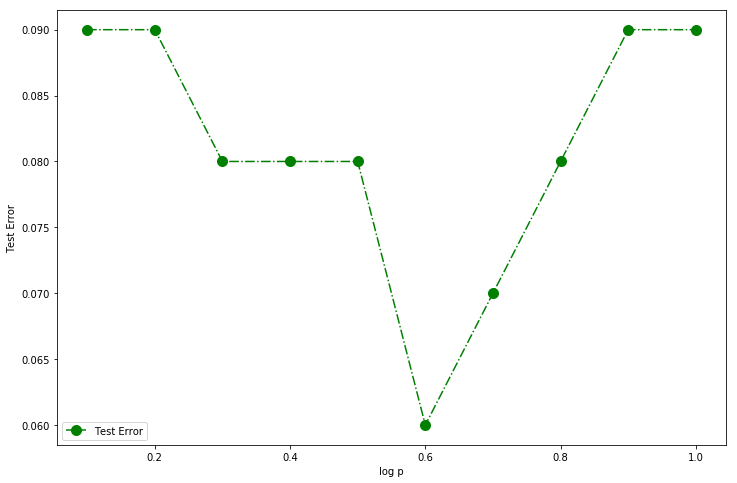

In [66]:
# Plotting the log(p) vs the test error
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(a,test_err,color = 'green', marker = 'o', linestyle = '-.',markersize = 10,label = 'Test Error')
plt.xlabel('log p')
plt.ylabel('Test Error')
plt.legend()

In [67]:
print('The best test error is {} and the best value of log10(p) is {} for k being equal to 6'.format(best_test_error[0][0],np.log10(best_test_error[0][1])))

The best test error is 0.06 and the best value of log10(p) is 0.6 for k being equal to 6


####C. which becomes Chebyshev Distance with p → ∞

In [0]:
# Training knn for different values of k and for p -> ∞
test_error = []
for k in range(1,200,5):
  clf = KNeighborsClassifier(n_neighbors = k, p = np.inf)
  clf.fit(x_train_d,y_train)
  y_pred_test = clf.predict(x_test)
  test_error.append((np.mean(y_pred_test != y_test),k))

In [69]:
best_test_error = sorted(test_error,key=itemgetter(0))
best_test_error[:5]


[(0.08, 16), (0.09, 6), (0.1, 36), (0.11, 21), (0.11, 76)]

In [0]:
print('The best test error is {} and the optimum value of k is {} when Chebyshev was used as the distance metric'.format(best_test_error[0][0],best_test_error[0][1]))

The best test error is 0.08 and the optimum value of k is 16 when Chebyshev was used as the distance metric


###ii Mahalanobis Distance

In [0]:
# Training knn for different values of k and distance metric set to Mahalanobis
test_error = []
for k in range(1,200,5):
  clf = KNeighborsClassifier(n_neighbors = k, algorithm ='brute',metric = 'mahalanobis', metric_params = {'V':np.cov(x_train_d)})
  clf.fit(x_train_d,y_train)
  y_pred_test = clf.predict(x_test)
  test_error.append((np.mean(y_pred_test != y_test),k))

In [71]:
best_test_error = sorted(test_error,key=itemgetter(0))
best_test_error[:5]

[(0.16, 6), (0.18, 1), (0.19, 11), (0.2, 16), (0.21, 26)]

In [72]:
print('The best test error is {} and the optimum k is {} when Mahalanobis was used as the distance metric'.format(best_test_error[0][0],best_test_error[0][1]))

The best test error is 0.16 and the optimum k is 6 when Mahalanobis was used as the distance metric


#### Summarizing best value of k and test error for different distance metrics

In [73]:
table = pd.DataFrame(data = {'Optimum k':[4,11,6,16,6],'Best_test_error':[0.06,0.11,0.06,0.08,0.16],'p':[2,1,0.6,'∞','-']},index = ['Euclidean','Manhattan','Manhattan','Chebyshev','Mahalanobis'])
table

,Optimum k,Best_test_error,p
Euclidean,4,0.06,2
Manhattan,11,0.11,1
Manhattan,6,0.06,0.6
Chebyshev,16,0.08,∞
Mahalanobis,6,0.16,-


###(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

#### Weighted Voting for Euclidean

In [0]:
test_error = []
for k in range(1,200,5):
  clf = KNeighborsClassifier(n_neighbors = k,weights = 'distance')
  clf.fit(x_train_d,y_train)
  y_pred_test = clf.predict(x_test)
  test_error.append((np.mean(y_pred_test != y_test),k))


In [75]:
best_test_error = sorted(test_error,key=itemgetter(0))
best_test_error[:5]

[(0.1, 6), (0.11, 16), (0.11, 21), (0.11, 26), (0.11, 31)]

In [76]:
print('The best test error is {} and the optimum k is {} for weighted voting with Euclidean as Distance metric'.format(best_test_error[0][0],best_test_error[0][1]))

The best test error is 0.1 and the optimum k is 6 for weighted voting with Euclidean as Distance metric


####Weighted Voting for Manhattan

In [0]:
test_error = []
for k in range(1,200,5):
  clf = KNeighborsClassifier(n_neighbors = k,weights = 'distance',p=1)
  clf.fit(x_train_d,y_train)
  y_pred_test = clf.predict(x_test)
  test_error.append((np.mean(y_pred_test != y_test),k))


In [78]:
best_test_error = sorted(test_error,key=itemgetter(0))
best_test_error[:5]

[(0.1, 26), (0.11, 6), (0.11, 11), (0.11, 21), (0.11, 31)]

In [0]:
print('The best test error is {} and the optimum k is {} for weighted voting with Manhattan as Distance metric'.format(best_test_error[0][0],best_test_error[0][1]))

The best test error is 0.1 and the optimum k is 26 for weighted voting with Manhattan as Distance metric


####Weighted Voting for Chebyshev

In [0]:
test_error = []
for k in range(1,200,5):
  clf = KNeighborsClassifier(n_neighbors = k,weights = 'distance',p=np.inf)
  clf.fit(x_train_d,y_train)
  y_pred_test = clf.predict(x_test)
  test_error.append((np.mean(y_pred_test != y_test),k))


In [80]:
best_test_error = sorted(test_error,key=itemgetter(0))
best_test_error[:5]

[(0.11, 16), (0.11, 31), (0.11, 36), (0.11, 41), (0.11, 61)]

In [81]:
print('The best test error is {} and the optimum k is {} for weighted voting with Chebyshev as Distance metric'.format(best_test_error[0][0],best_test_error[0][1]))

The best test error is 0.11 and the optimum k is 16 for weighted voting with Chebyshev as Distance metric


####Summary table for Weighted Voting

In [82]:
table = pd.DataFrame(data = {'Optimum k':[6,26,16],'Best_test_error':[0.1,0.1,0.11],'p':[2,1,'∞']},index = ['Euclidean','Manhattan','Chebyshev'])
table

,Optimum k,Best_test_error,p
Euclidean,6,0.10,2
Manhattan,26,0.10,1
Chebyshev,16,0.11,∞


###(f) What is the lowest training error rate you achieved in this homework?

At k = 1 achieved a training error of 0 when the distance metric used was Euclidean